# ANÁLISE DOS DADOS DO E-COMMERCE OLIST

## INÍCIO.

    * Importe das bibliotecas
    * Definindo o caminho da pasta
    * Criação de um dicionário com nomes do arquivos
    * Carregamento do Dataframe
    * Acessando o Dataframe   

In [1]:
# --- IMPORTANDO AS BIBLIOTECAS DE TRABALHO ---

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import datetime as dt

In [2]:
# --- 1: DEFININDO O CAMINHO DA PASTA ---

# Usarei o 'r' para que antes da string o python leia o caminho corretamente
caminho_da_pasta = r"C:\Users\User\Desktop\Pasta de projeto Kaggle\Analise_E-commerce\dados"
print(' As bibliotecas foram carregada com sucesso!')
print(' Caminho da nova pasta criado com sucesso!')

 As bibliotecas foram carregada com sucesso!
 Caminho da nova pasta criado com sucesso!


In [3]:
# --- 2: CRIANDO UM DICIONÁRIO COM OS NOMES DO ARQUIVOS (SEM ALTERAÇÂO) ---

nomes_dos_arquivos = {'customers': 'olist_customers_dataset.csv',
    'geolocation': 'olist_geolocation_dataset.csv',
    'order_items': 'olist_order_items_dataset.csv',
    'order_payments': 'olist_order_payments_dataset.csv',
    'order_reviews': 'olist_order_reviews_dataset.csv',
    'orders': 'olist_orders_dataset.csv',
    'products': 'olist_products_dataset.csv',
    'sellers': 'olist_sellers_dataset.csv',
    'category_translation': 'product_category_name_translation.csv'}

In [4]:
# --- 3: CARREGANDO CADA ARQUIVO EM UM DATAFRAME ---
import pandas as pd
import os

dataframes = {}
print("Iniciando o carregamento dos arquivos do novo diretório...")

for nome_df, nome_arquivo in nomes_dos_arquivos.items():
    caminho_completo = os.path.join(caminho_da_pasta, nome_arquivo)
    try:
        # Agora o Python sabe o que 'pd' significa!
        dataframes[nome_df] = pd.read_csv(caminho_completo)
        print(f"✅ Arquivo '{nome_arquivo}' carregado com sucesso!")
    except FileNotFoundError:
        print(f"❌ ERRO: Arquivo '{nome_arquivo}' não encontrado no caminho: {caminho_completo}")
        print("   Verifique se o arquivo está realmente dentro da pasta.")

Iniciando o carregamento dos arquivos do novo diretório...
✅ Arquivo 'olist_customers_dataset.csv' carregado com sucesso!
✅ Arquivo 'olist_geolocation_dataset.csv' carregado com sucesso!
✅ Arquivo 'olist_order_items_dataset.csv' carregado com sucesso!
✅ Arquivo 'olist_order_payments_dataset.csv' carregado com sucesso!
✅ Arquivo 'olist_order_reviews_dataset.csv' carregado com sucesso!
✅ Arquivo 'olist_orders_dataset.csv' carregado com sucesso!
✅ Arquivo 'olist_products_dataset.csv' carregado com sucesso!
✅ Arquivo 'olist_sellers_dataset.csv' carregado com sucesso!
✅ Arquivo 'product_category_name_translation.csv' carregado com sucesso!


In [5]:
# --- 4: ACESSANDO UMA AMOSTRA DA TABELA ---

if 'orders' in dataframes:
    print("\n--- Amostra da Tabela de Pedidos Carregada ---")
    df_orders = dataframes['orders']
    print(df_orders.head())


--- Amostra da Tabela de Pedidos Carregada ---
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   


## ANÁLISE DE FATURAMENTO POR ESTADO.
    * Top 5 estados com maior faturamento

In [6]:
# --- 1: JUNÇÃO de Tabelas (df_orders e df_customers) ---

# Utilizando os DataFrames de pedidos e clientes do dicionário:
df_orders = dataframes['orders']
df_customers = dataframes['customers']

# A "ponte" que vai conecta as duas tabelas é a coluna 'customer_id', que existe em ambas.
# Utilizando o pd.merge para juntar as duas tabelas.
df_merged = pd.merge(
    df_orders,        # Tabela da esquerda
    df_customers,     # Tabela da direita
    on='customer_id'  # Coluna usada para conectar as duas
)

print("--- DATAFRAME JUNTADO (Pedidos + Clientes) ---")
print("Colunas do novo DataFrame:", df_merged.columns.tolist())
print("\n--- Amostra do Novo DataFrame ---")
df_merged

--- DATAFRAME JUNTADO (Pedidos + Clientes) ---
Colunas do novo DataFrame: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

--- Amostra do Novo DataFrame ---


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [7]:
# --- 2: VERIFICAÇÃO DOS TIPOS DE DADOS ---

# Verificando os tipos de dados e valores nulos do dataframe combinado
print("--- Check-up do DataFrame df_merged ---")
df_merged.info()

--- Check-up do DataFrame df_merged ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   customer_unique_id             99441 non-null  object
 9   customer_zip_code_prefix       99441 non-null  int64 
 10  customer_city                  99441 non-null  object
 11  customer_state                 99441 non-null  object
dtypes: int64(1), object(

In [8]:
# --- 3: CONVERTENDO TODAS AS COLUNAS PARA O FORMATO DATETIME ---

# Criando uma lista das colunas que estão com datas
colunas_de_datas = [
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_carrier_date',
    'order_delivered_customer_date', 
    'order_estimated_delivery_date'
]

# Criando um loop para converter cada coluna da lista para datetime
for coluna in colunas_de_datas:
    df_merged[coluna] = pd.to_datetime(df_merged[coluna])

print('Colunas de data convertida com sucesso!')

# Verificando o resultado com .info() para confirmar as mudança
df_merged.info()

Colunas de data convertida com sucesso!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   customer_unique_id             99441 non-null  object        
 9   customer_zip_code_prefix       99441 non-null  int64         
 10  customer_city                  99441 non-n

In [9]:
# --- 4: CRIANDO UMA NOVA JUNÇÃO ---

# Utilizando os dataframes (df_payments, df_order_items, df_products) que foram carregados.
df_payments = dataframes['order_payments']
df_order_items = dataframes['order_items']
df_products = dataframes['products']

# Juntando os pagamentos no df_merged
df_completo = pd.merge(df_merged, df_payments, on='order_id', how='left')

# Juntando os itens do pedido
df_completo = pd.merge(df_completo, df_order_items, on='order_id', how='left')

# Juntando as informações dos produtos
df_completo = pd.merge(df_completo, df_products, on='product_id', how='left')


print("--- DATAFRAME CRIADO COM SUCESSO! ---")
print(f"O DataFrame completo tem {df_completo.shape[0]} linhas e {df_completo.shape[1]} colunas.")
print("\nColunas disponíveis:", df_completo.columns.tolist())
print("\n--- Amostra do DataFrame Completo ---")

df_completo

--- DATAFRAME CRIADO COM SUCESSO! ---
O DataFrame completo tem 118434 linhas e 30 colunas.

Colunas disponíveis: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

--- Amostra do DataFrame Completo ---


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,174.90,20.10,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0
118430,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,205.99,65.02,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0
118431,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
118432,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0


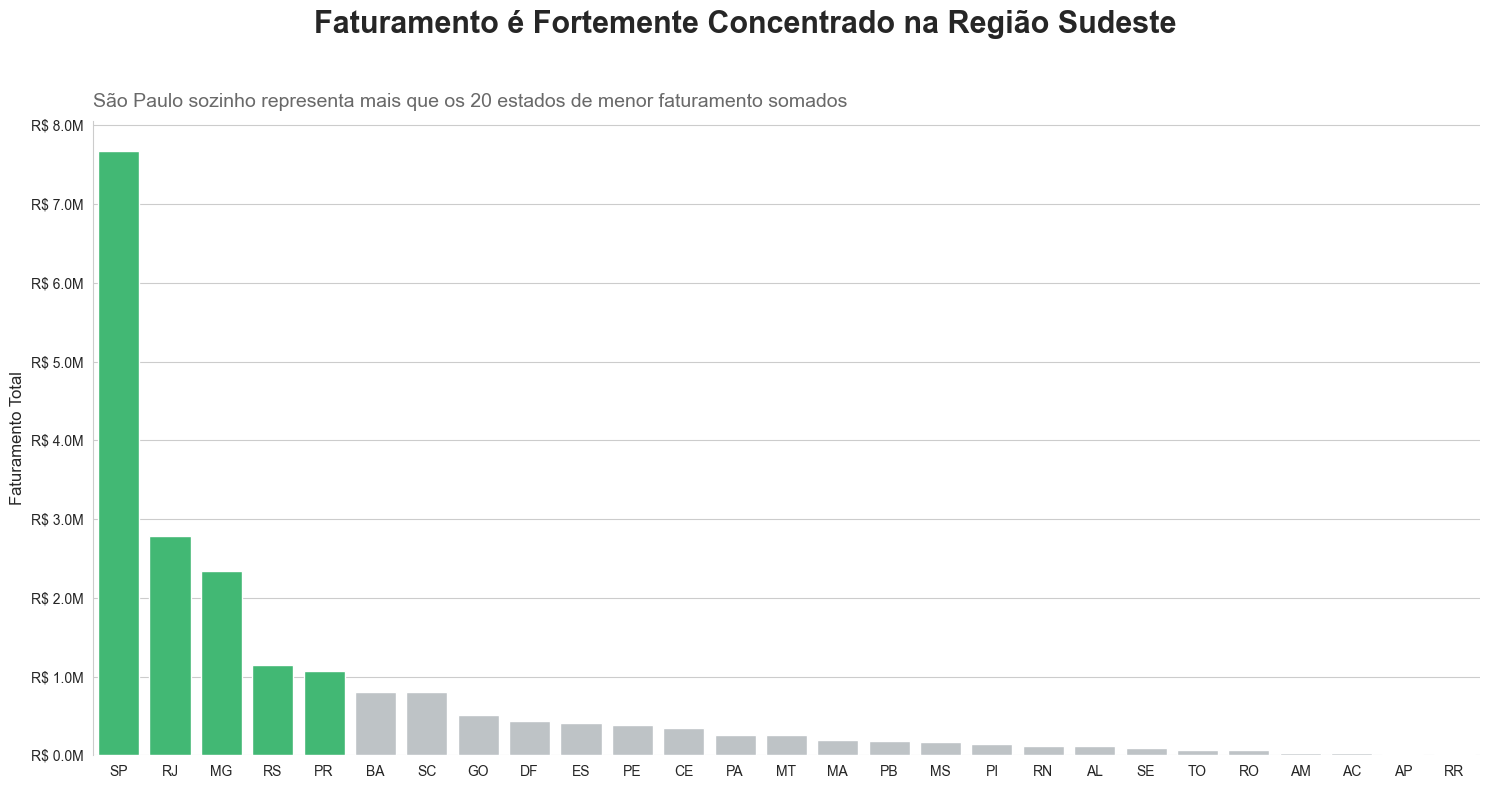

In [10]:
# --- 5: CALCULO DO FATURAMENTO E VISUALIZAÇÃO EM GRÁFICO ---

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter 

# --- 1: PREPARAÇÃO DOS DADOS ---

# Calculando o faturamento por estado:
faturamento_por_estado = df_completo.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False)

# --- 2: ANÁLISE PARA O GRÁFICO ---

# Adicionando uma paleta de cores com foco nos Top 5 estados:
top_5_estados = faturamento_por_estado.head(5).index
cor_destaque = '#2ecc71' # Adicionando ,um verde vibrante
cor_base = '#bdc3c7' # Adicionando um cinza neutro
paleta_foco = [cor_destaque if estado in top_5_estados else cor_base for estado in faturamento_por_estado.index]

# --- 3: DESENVOLVIMENTO DO GRÁFICO ---

# Usando fig, ax para melhor controle:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15, 8))

# Criando o gráfico de barras.
sns.barplot(
    x=faturamento_por_estado.index, 
    y=faturamento_por_estado.values, 
    palette=paleta_foco,
    ax=ax,
    hue=faturamento_por_estado.index,
    legend=False
)

# --- 4: ANOTAÇÕES E DESIGN ---

# Títulos:
fig.suptitle('Faturamento é Fortemente Concentrado na Região Sudeste', fontsize=22, fontweight='bold', y=0.98)
ax.set_title('São Paulo sozinho representa mais que os 20 estados de menor faturamento somados', fontsize=14, pad=10, loc='left', color='dimgray')

# Configurando o Eixo Y:
# Adiconando uma função para formatar os números para milhões (ex: 14000000 -> R$ 14.0M)
def format_reais(valor, pos):
    'Recebe o valor e retorna no formato R$ XM'
    valor_em_milhoes = valor / 1e6
    return f'R$ {valor_em_milhoes:.1f}M'

formatter = FuncFormatter(format_reais)
ax.yaxis.set_major_formatter(formatter)

# 4: Criando um design:
ax.set_xlabel('') # O título vai deixa claro quem são estados
ax.set_ylabel('Faturamento Total', fontsize=12)
sns.despine(bottom=True) # Remove a borda de baixo para um visual mais limpo

# Ajusta o layout:
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## ANÁLISE DE RELAÇÃO ENTRE TEMPO DE ENTREGA E A SASTISFAÇÃO DO CLIENTE.
    1. Clientes que recebem seus produtos mais rápido dão notas de avaliação melhores?.
         * Tempo de Entrega à Satisfação
         * Tempo de Entrega Real
         * Diferença da Estimativa
         * Análise de Satisfação por Categoria

In [11]:
# --- 1: DADOS DE AVALIAÇÃO (REVIEWS) ---

# Utilizando a tabela de avaliação do discionário criado.
df_reviews = dataframes['order_reviews']

# Juntando as avaliações ao Dataframe completo, utilizando a chave 'orders_id'.
# Utilizei um 'left' merge para garantir que não vou perder nenhum pedido.
df_final = pd.merge(df_completo, df_reviews, on='order_id', how='left')

print('TABELA DE AVALIAÇÃO JUNTADA COM SUCESSO!')
print(f'Dataframe final agora tem {df_final.shape[1]} colunas.')


TABELA DE AVALIAÇÃO JUNTADA COM SUCESSO!
Dataframe final agora tem 36 colunas.


In [12]:
# --- 2: TEMPO REAL DE ENTREGA ---
# Analisando a diferença em dias entre a data da compra e a data que o cliente recebeu o produto.

# 2.1: Calculando o tempo de entrega real em (dias)
# Subtraindo a data de entrega da data de compra. O '.dt.days' vai extrai apenas o número de dias.
df_final['tempo_de_entrega'] = (df_completo['order_delivered_customer_date'] - df_final['order_purchase_timestamp']).dt.days

# 2.2: Calculando a diferença em relação a estimativa
# Um valor negativo significa que chegou adiantado. Um valor positivo, que chegou atrasado.
df_final['diferenca_estimativa_entrega'] = (df_final['order_delivered_customer_date'] - df_final['order_estimated_delivery_date']).dt.days

print('NOVAS COLUNAS DE TEMPO CRIADAS COM SUCESSO!')
print('\n--- Visualização das novas colunas ---')
print(df_final[['review_score', 'tempo_de_entrega', 'diferenca_estimativa_entrega']].head())


NOVAS COLUNAS DE TEMPO CRIADAS COM SUCESSO!

--- Visualização das novas colunas ---
   review_score  tempo_de_entrega  diferenca_estimativa_entrega
0           4.0               8.0                          -8.0
1           4.0               8.0                          -8.0
2           4.0               8.0                          -8.0
3           4.0              13.0                          -6.0
4           5.0               9.0                         -18.0


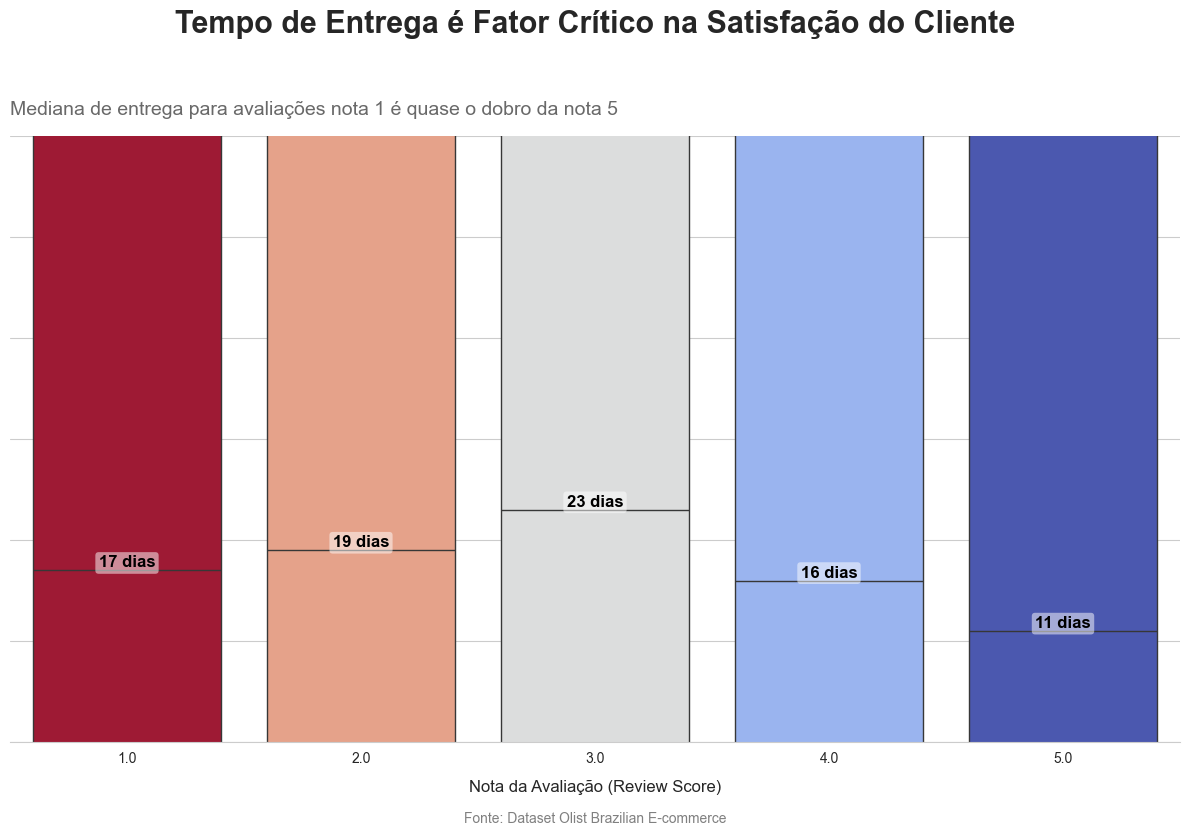

In [ ]:
# --- 3: ANALISE VISUAL ---

# --- 1: PRÉ-ANÁLISE PARA ANOTAÇÕES ---

# Calculando a mediana do tempo de entrega para cada nota de avaliação ANTES de plotar.
# Isso dará os valores exatos para anotar no gráfico.
medians = df_final.groupby(['review_score'])['tempo_de_entrega'].median().sort_index()

# --- 2: CRIAÇÃO DO GRÁFICO ---

# Utilizando fig, ax para ter mais controle sobre a figura
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

# Criando o boxplot.
sns.boxplot(
    data=df_final, 
    x='review_score', 
    y='tempo_de_entrega', 

    # Adicionando uma paleta que reforça a história (ruim -> bom)
    palette='coolwarm_r', 
    hue='review_score',
    legend=False,
    ax=ax # Aqui Especifico o eixo para plotar
)

# --- 3: ANOTAÇÕES ---

# Adicionando os valores da mediana diretamente nos boxplots
# Loop através das medianas que foi calculadas para posicionar o texto
for i, median_val in enumerate(medians):
    ax.text(
        i,                         # A posição X (0 para a primeira nota, 1 para a segunda, etc.)
        median_val,                # A posição Y (o valor da mediana)
        f'{median_val:.0f} dias',  # O texto a ser exibido (ex: "21 dias")
        ha='center',               # Configuração do alinhamento horizontal
        va='bottom',               # Configuração do alinhamento vertical
        fontweight='bold',
        fontsize=12,
        color='black',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.2')
    )

# --- 4: TÍTULOS, RÓTULOS E AJUSTES FINAIS ---

# Títulos com (principal + subtítulo)
fig.suptitle('Tempo de Entrega é Fator Crítico na Satisfação do Cliente', fontsize=22, fontweight='bold', y=1.0)
ax.set_title('Mediana de entrega para avaliações nota 1 é quase o dobro da nota 5', fontsize=14, pad=15, loc='left', color='dimgray')

# Design
ax.set_xlabel('Nota da Avaliação (Review Score)', fontsize=12, labelpad=10)
ax.set_ylabel('') # Removido do título Y, pois a informação principal está nas anotações
ax.set_yticklabels([]) # Removido os números do eixo Y para um visual mais limpo

# Focando na visualização.
ax.set_ylim(0, 60)
sns.despine(left=True) # Remove a linha do eixo da esquerda

# Adicionando uma nota de rodapé com a fonte dos dados.
fig.text(0.5, -0.02, 'Fonte: Dataset Olist Brazilian E-commerce', ha='center', va='bottom', fontsize=10, color='gray')

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta o layout para caber o suptitle
plt.show()

In [14]:
# --- 4: ANÁLISE DE SASTIFAÇÃO POR CATEGORIA ---

# Agrupando por categoria e calculando a nota média de avaliação
satisfacao_por_categoria = df_final.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False)

print("--- Nota Média de Avaliação por Categoria ---")
print(" MELHORES AVALIAÇÕES:")
print(satisfacao_por_categoria.head())
print("\n PIORES AVALIAÇÕES:")
print(satisfacao_por_categoria.tail())

--- Nota Média de Avaliação por Categoria ---
 MELHORES AVALIAÇÕES:
product_category_name
cds_dvds_musicais                4.642857
fashion_roupa_infanto_juvenil    4.500000
livros_interesse_geral           4.438503
flores                           4.419355
livros_importados                4.419355
Name: review_score, dtype: float64

 PIORES AVALIAÇÕES:
product_category_name
moveis_escritorio                                3.526791
portateis_cozinha_e_preparadores_de_alimentos    3.266667
fraldas_higiene                                  3.256410
pc_gamer                                         3.100000
seguros_e_servicos                               2.500000
Name: review_score, dtype: float64


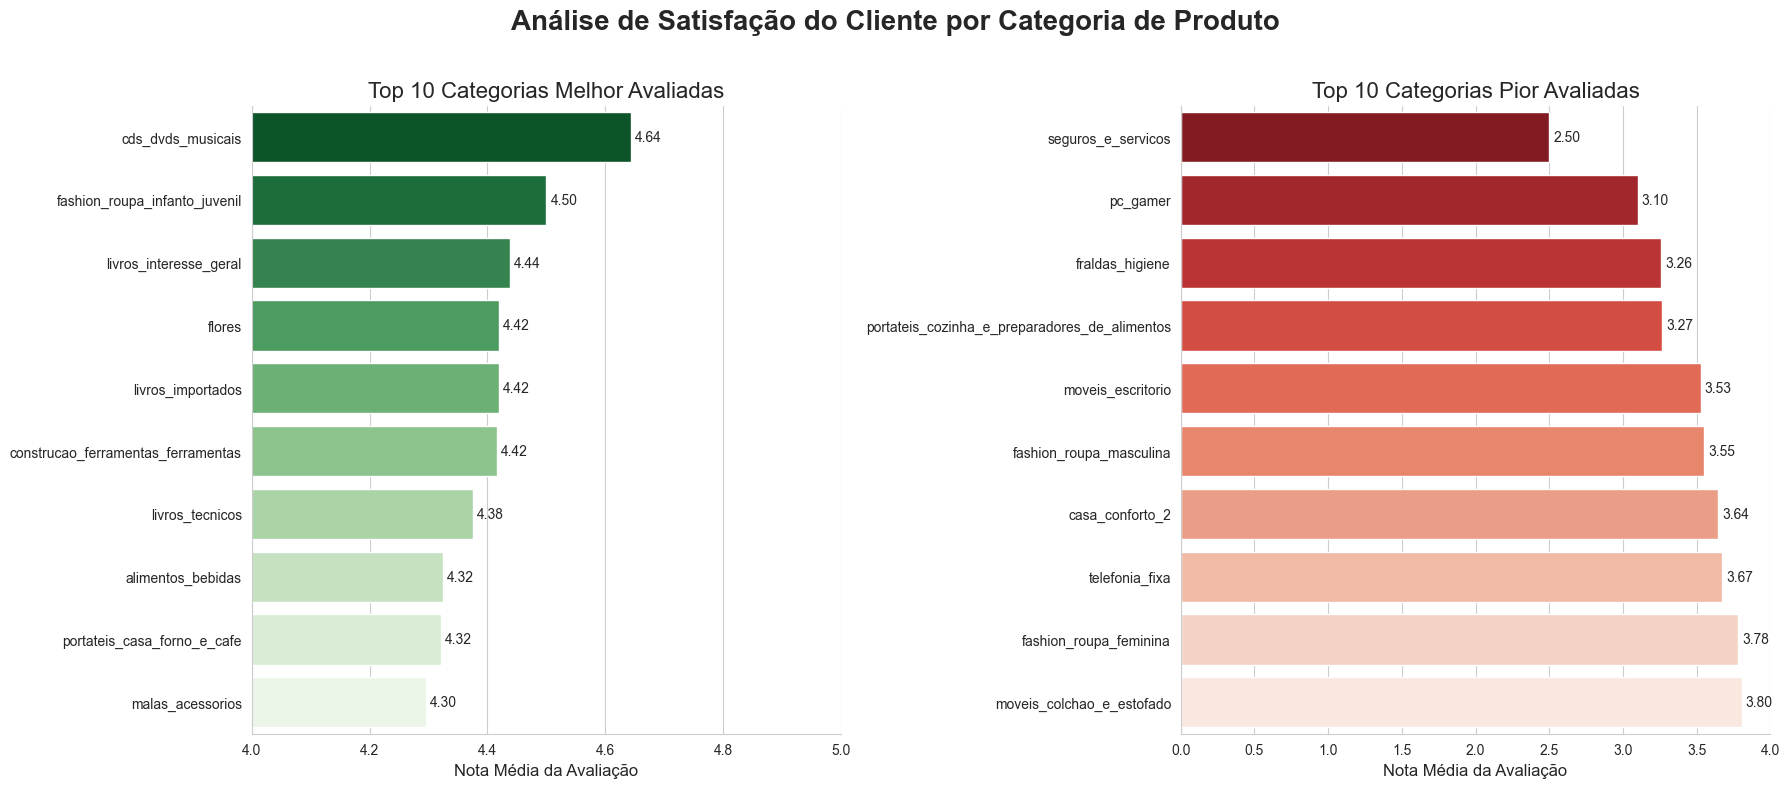

In [ ]:
# --- 5: VISUSALIZAÇÃO (AS MELHORES E PIORES) ---

# --- Preparando os dados para os dois gráficos ---
melhores_categorias = satisfacao_por_categoria.head(10)
piores_categorias = satisfacao_por_categoria.tail(10).sort_values(ascending=True) # Ordenei para a pior ficar no topo

# --- 1: CRIANDO A FIGURA ---

# Figura com dois subplots (Um au lado do outro)
fig, axes = plt.subplots(1, 2, figsize=(18, 8)) # 1 linha, 2 colunas

# --- 2: TÍTULO PRINCIPAL DA FIGURA ---
fig.suptitle('Análise de Satisfação do Cliente por Categoria de Produto', fontsize=20, fontweight='bold')

# --- 3: GRÁFICO 1 -> AS 10 CATEGORIAS MELHOR AVALIADAS ---
sns.barplot(ax=axes[0], x=melhores_categorias.values, y=melhores_categorias.index, palette='Greens_r', hue=melhores_categorias.index, legend=False)
axes[0].set_title('Top 10 Categorias Melhor Avaliadas', fontsize=16)
axes[0].set_xlabel('Nota Média da Avaliação', fontsize=12)
axes[0].set_ylabel('')
axes[0].set_xlim(4, 5) # Foquei na escala para ver melhor a diferença
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f', padding=3)

# --- 4: GRÁFICO 2 -> AS 10 CATEGORIRAS PIOR AVALIADAS ---
sns.barplot(ax=axes[1], x=piores_categorias.values, y=piores_categorias.index, palette='Reds_r', hue=piores_categorias.index, legend=False)
axes[1].set_title('Top 10 Categorias Pior Avaliadas', fontsize=16)
axes[1].set_xlabel('Nota Média da Avaliação', fontsize=12)
axes[1].set_ylabel('')
axes[1].set_xlim(0, 4) # Foquei na escala para ver melhor a diferença
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f', padding=3)

# --- 5: AJUSTES FINAIS ---
sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajuste para o suptitle caber

plt.show()

In [ ]:
# --- 6: TEMPO MÉDIO DE ENTREGA ---

# Pegando a lista das 10 piores categorias:
lista_piores_categorias = piores_categorias.index.tolist()

# Filtrando o DataFrame principal para conter apenas as piores categorias:
df_piores_categorias = df_final[df_final['product_category_name'].isin(lista_piores_categorias)]

# Calculando o tempo médio de entrega para esse grupo:
media_entrega_piores = df_piores_categorias['tempo_de_entrega'].mean()
media_entrega_geral = df_final['tempo_de_entrega'].mean()

print(f"O tempo médio de entrega geral é de: {media_entrega_geral:.1f} dias.")
print(f"O tempo médio de entrega para as 10 piores categorias é de: {media_entrega_piores:.1f} dias.")

O tempo médio de entrega geral é de: 14.0 dias.
O tempo médio de entrega para as 10 piores categorias é de: 54.6 dias.


## ANÁLISE DE CATEGORIAS DE PRODUTOS.
    1. Quais são as categorias de produtos que mais vendem e quais são as que menos vendem?
         * Contar as Vendas por Categoria
         * Visualização (Top 10 Categorias)

    2. Será que as categorias que mais vendem em volume são as mesmas que geram o maior faturamento?
         * Análise de Faturamento por Categoria
         * A Análise Crítica (Comparando os Rankings)
         * Visualização (Top 10 Faturamento)

    3. Quais são as categorias de "luxo" (itens caros) e quais são as de "volume" (itens baratos)? Isso vai explicar por que os rankings de faturamento e volume de vendas são diferentes.
         * Análise de Preço Médio (Ticket Médio)

In [17]:
# --- CONTAGEM DE VENDAS POR CATEGORIA ---

# Contagem das ocorrências de cada categoria e ordenando do maior para o menor
vendas_por_categoria = df_final['product_category_name'].value_counts()

print("--- CONTAGEM DE VENDAS POR CATEGORIA ---")

--- CONTAGEM DE VENDAS POR CATEGORIA ---


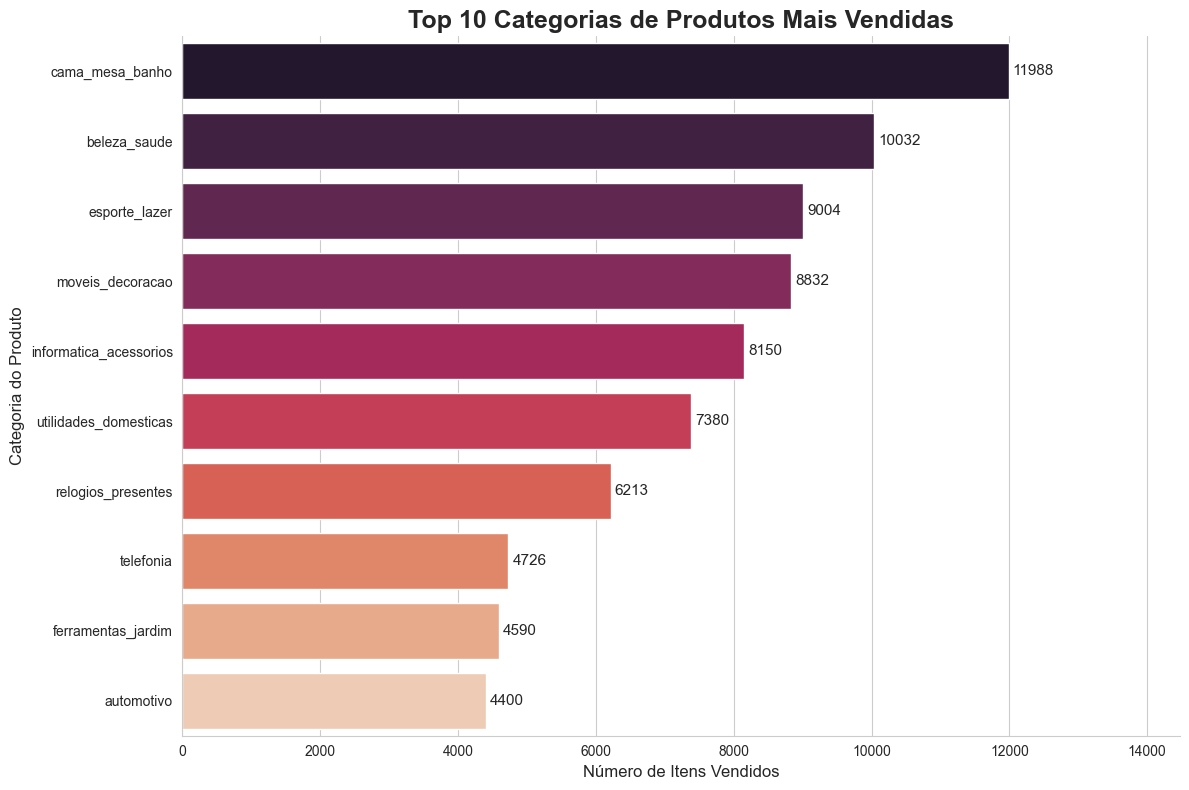

In [ ]:
# --- 3: VISUALIZAÇÃO DOS TOP 10 CATEGORIAS MAIS VENDIDAS ---

# --- 1: PREPARANDO OS DADOS PARA O GRÁFICO ---

# Pegando as 10 mais vendidas:
top_10_categorias = vendas_por_categoria.head(10)

# --- 2: CRIANDO O GRÁFICO ---

# Criação do gráfico:
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x=top_10_categorias.values,
    y=top_10_categorias.index,
    palette='rocket',
    hue=top_10_categorias.index,
    legend=False
)

# --- 3: ADICIONANDO OS RÓTULOS DE DADOS ---

# adicionando um loop para deixar mais seguro caso uma categoria não tenha valor:
for container in ax.containers:
    ax.bar_label(container, fontsize=11, padding=3)

# --- 4: TÍTULO E DESIGN ---

plt.title('Top 10 Categorias de Produtos Mais Vendidas', fontsize=18, fontweight='bold')
plt.xlabel('Número de Itens Vendidos', fontsize=12)
plt.ylabel('Categoria do Produto', fontsize=12)
sns.despine()

# Ajusta o limite do eixo X para dar espaço para as anotações
ax.set_xlim(0, ax.get_xlim()[1] * 1.15)

plt.tight_layout()
plt.show()

    * Análise de Faturamento por Categoria

In [19]:
# --- 4: CALCULANDO O FATURAMENTO POR CATEGORIA ---

# Agrupando por categoria e somando o valores de pagamento para obter o faturamento:
faturamento_por_categoria = df_final.groupby('product_category_name')['payment_value'].sum().sort_values(ascending=False)

print("--- FATURAMENTO TOTAL POR CATEGORIA ---")

--- FATURAMENTO TOTAL POR CATEGORIA ---


In [ ]:
# --- 5: ANÁLISE COMPARATIVO ( TOP DE VOLUME DE VENDAS VS TOP 10 FATURAMENTO)

# Pegando os nomes dos top 10 categorias de cada lista
top_10_volume = vendas_por_categoria.head(10).index.tolist()
top_10_faturamento = faturamento_por_categoria.head(10).index.tolist()

print("--- TOP 10 POR VOLUME DE VENDAS ---")
print(top_10_volume)
print("\n--- TOP 10 POR FATURAMENTO ---")
print(top_10_faturamento)

# Verificando quais categorias estão no topo de faturamento, mas não no de volume
diferenca = set(top_10_faturamento) - set(top_10_volume)
if diferenca:
    print(f"\n Insight: As seguintes categorias têm alto faturamento, mas não estão no top 10 de vendas em volume: {list(diferenca)}")
else:
    print("\n Insight: Os rankings de volume e faturamento são muito similares no topo.")

--- TOP 10 OR VOLUME DE VENDAS ---
['cama_mesa_banho', 'beleza_saude', 'esporte_lazer', 'moveis_decoracao', 'informatica_acessorios', 'utilidades_domesticas', 'relogios_presentes', 'telefonia', 'ferramentas_jardim', 'automotivo']

--- TOP 10 POR FATURAMENTO ---
['cama_mesa_banho', 'beleza_saude', 'informatica_acessorios', 'moveis_decoracao', 'relogios_presentes', 'esporte_lazer', 'utilidades_domesticas', 'automotivo', 'ferramentas_jardim', 'cool_stuff']

 Insight: As seguintes categorias têm alto faturamento, mas não estão no top 10 de vendas em volume: ['cool_stuff']


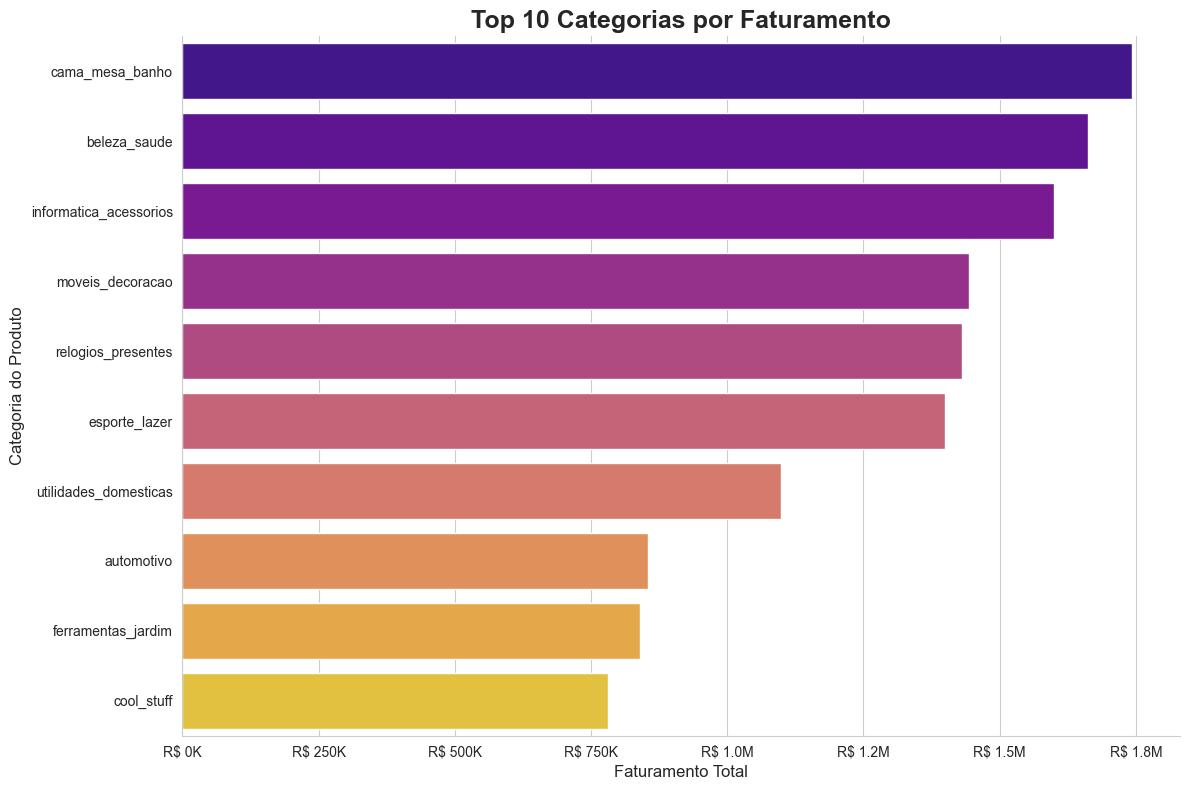

In [21]:
# --- 6: VISUALIZAÇÃO DOS TOP 10 POR FATURAMENTOS ---

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# --- PREPARANDO DADOS PARA O GRÁFICO ---

# Pegando as 10 de maior faturamento
top_10_faturamento_df = faturamento_por_categoria.head(10)

# CRIANDO O GRÁFICO ---

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x=top_10_faturamento_df.values,
    y=top_10_faturamento_df.index,
    palette='plasma',
    hue=top_10_faturamento_df.index,
    legend=False
)

# --- FORMATAÇÃO DO EIXO (X) ---

# Formatando o eixo X para mostrar os valores em milhões (R$1.2M)
def format_reais(valor, pos):
    'receve o valor e retorna no formato R$ XM ou R$ XK'
    if valor >= 1e6:
        valor_formatado = valor / 1e6
        return f'R$ {valor_formatado:.1f}M'
    else:
        valor_formatado = valor / 1e3
        return f'R$ {valor_formatado:.0f}K'

formatter = FuncFormatter(format_reais)
ax.xaxis.set_major_formatter(formatter)

# --- TÍTULO DE DESING ---
plt.title('Top 10 Categorias por Faturamento', fontsize=18, fontweight='bold')
plt.xlabel('Faturamento Total', fontsize=12)
plt.ylabel('Categoria do Produto', fontsize=12)
sns.despine()

plt.tight_layout()
plt.show()

    * Análise de Preços Médio

In [22]:
# --- 7: ANÁLISE DO PREÇO MÉDIO ---

# --- CALCULANDO O PREÇO MÉDIO POR CATEGORUIA ---

# Utilizando a coluna 'price' que representa o valor de um item individual
preco_medio_por_categoria = df_final.groupby('product_category_name')['price'].mean().sort_values(ascending=False)

print("--- Categorias com Maior Preço Médio (Ticket Médio) ---")
print(preco_medio_por_categoria.head(10))

print("\n--- Categorias com Menor Preço Médio (Ticket Médio) ---")
print(preco_medio_por_categoria.tail(10))

--- Categorias com Maior Preço Médio (Ticket Médio) ---
product_category_name
pcs                                              1103.689136
portateis_casa_forno_e_cafe                       627.509103
eletrodomesticos_2                                457.529481
agro_industria_e_comercio                         332.706151
instrumentos_musicais                             293.398651
eletroportateis                                   286.297248
portateis_cozinha_e_preparadores_de_alimentos     264.568667
telefonia_fixa                                    226.989890
construcao_ferramentas_seguranca                  210.942261
relogios_presentes                                201.886842
Name: price, dtype: float64

--- Categorias com Menor Preço Médio (Ticket Médio) ---
product_category_name
bebidas                   58.799385
eletronicos               58.646911
fashion_roupa_feminina    57.788800
alimentos                 57.261293
artigos_de_natal          56.947355
alimentos_bebidas        

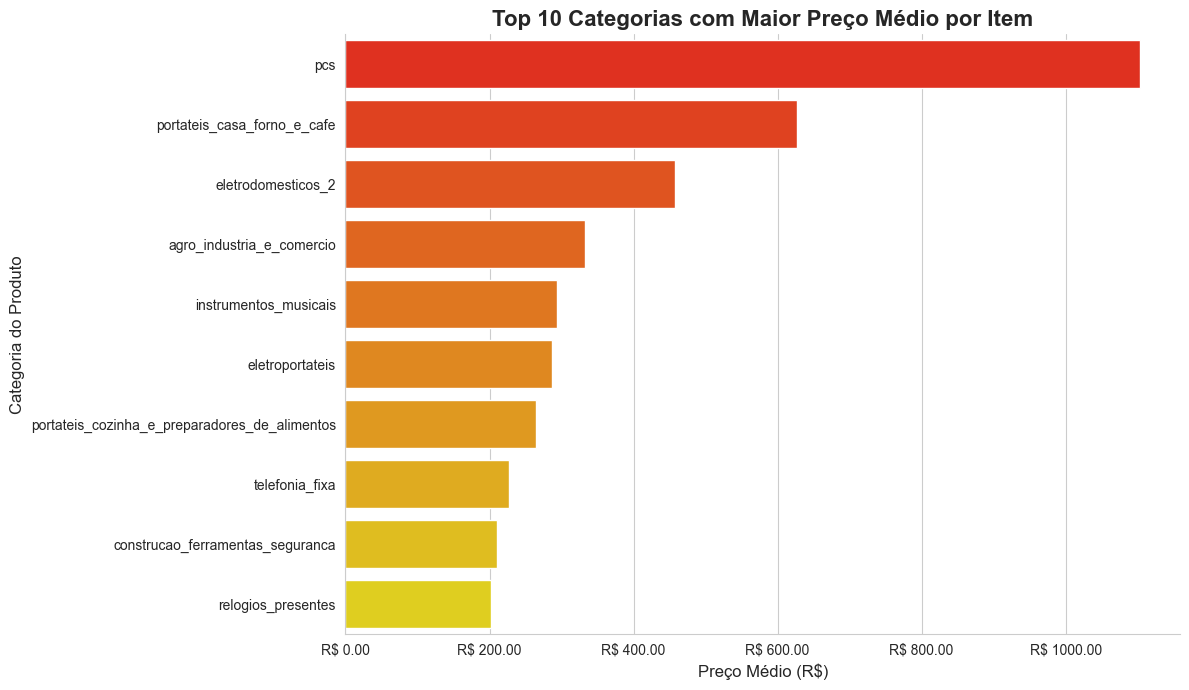

In [23]:
# --- 8: VISUALIZAÇÃO DAS 10 CATEGORIAS MAIS CARAS ---

top_10_caras = preco_medio_por_categoria.head(10)

# --- CRIANDO O GRÁFICO ---

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x=top_10_caras.values,
    y=top_10_caras.index,
    palette='autumn',
    hue=top_10_caras.index,
    legend=False
)

# FORMATNDO O EIXO X

# Para demosntrar o valor em Reais (R$)
formatter = FuncFormatter(lambda x, _: f'R$ {x:.2f}')
ax.xaxis.set_major_formatter(formatter)

# --- TÍTULO DE DESING ---
plt.title('Top 10 Categorias com Maior Preço Médio por Item', fontsize=16, fontweight='bold')
plt.xlabel('Preço Médio (R$)', fontsize=12)
plt.ylabel('Categoria do Produto', fontsize=12)
sns.despine()

plt.tight_layout()
plt.show()

## ANÁLISE DE VENDEDORES.
    * Quem são os nossos melhores vendedores? O sucesso de vendas é concentrado em poucos vendedores ou bem distribuído?
        * Análise de Vendedores (Sellers)
        * Calculo das Métricas de Performance por Vendedor
        * Faturamento por vendedor, por ano
        * Indentificando os maiores vendedores por ano
        * Top 5 vendedores que mais faturaram por ano?

    * Onde estão localizado os melhores vendedores?
        *  Calculando o faturamento agregando por estado 
        * Visualização da localização dos vendedores 


In [24]:
# --- 1: ANÁLISE DE VENDEDORES ---

#  Utilizando a tabela de vendedores:
df_sellers = dataframes['sellers']

# Juntando as informações dos vendedores ao Dataframe final
# O how='left' vai garantir que não vou perder nenhum item de pedido, mesmo que um vendedor não seja encontrado
df_com_sellers = pd.merge(df_final, df_sellers, on='seller_id', how='left')

print("AS INFORMAÇÕES DOS VENDEDORES, FORAM COMBINADAS COM SUCESSO!")
print(f"O DataFrame agora tem as colunas 'seller_zip_code_prefix', 'seller_city', e 'seller_state'.")

AS INFORMAÇÕES DOS VENDEDORES, FORAM COMBINADAS COM SUCESSO!
O DataFrame agora tem as colunas 'seller_zip_code_prefix', 'seller_city', e 'seller_state'.


In [25]:
# --- 2: VERIFICAÇÃO DOS VALORES NULOS DA NOVA COLUNA ---

# Verificando quantos valores nulos foram criados na coluna 'seller_state' após o merge:
nulos_criados = df_com_sellers['seller_state'].isnull().sum()

if nulos_criados > 0:
    print(f" ALERTA: Foram encontradas {nulos_criados} vendas de vendedores sem correspondência na tabela de sellers.")
else:
    print(" VERIFICAÇÃO CONCLUÍDA: Todos os vendedores das vendas foram encontrados na tabela de sellers. Nenhum valor nulo foi criado.")

 ALERTA: Foram encontradas 833 vendas de vendedores sem correspondência na tabela de sellers.


In [26]:
# --- 3: QUANTIFICAR O IMPACTO ---

total_itens_vendidos = len(df_com_sellers)
impacto_percentual = (833 / total_itens_vendidos) * 100

# Filtrando as linhas com problema para ver o impacto financeiro
df_vendas_sem_vendedor = df_com_sellers[df_com_sellers['seller_state'].isnull()]
impacto_financeiro = df_vendas_sem_vendedor['payment_value'].sum()

print("--- ANÁLISE DE IMPACTO DO PROBLEMA DE INTEGRIDADE ---")
print(f"\nTotal de itens de pedidos analisados: {total_itens_vendidos}")
print(f"Itens de pedidos com vendedor não encontrado: 833 ({impacto_percentual:.2f}%)")
print(f"Faturamento total associado a esses itens: R$ {impacto_financeiro:,.2f}")
print("\nO impacto é (< 1% das vendas). Para a ANÁLISE DE VENDEDORES, a decisão mais limpa e segura é remover essas 833 linhas, pois não posso atribuí-las a nenhum estado ou vendedor.")

# --- 2: ISOLAR OS "VENDEDORES FANTASMAS" ---

vendedores_fantasma = df_vendas_sem_vendedor['seller_id'].unique().tolist()

# --- 3: DECISÃO ESTRATÉGICA E IMPLEMENTAÇÃO ---

# Criando um novo Dataframe sem null, apenas para as análises de vendedores
df_vendedores_validos = df_com_sellers.dropna(subset=['seller_state']).copy()

print(f"\nDataFrame 'df_vendedores_validos' criado com {len(df_vendedores_validos)} linhas.")
print("\nEste novo DataFrame será usado para todas as análises geográficas de vendedores.")

--- ANÁLISE DE IMPACTO DO PROBLEMA DE INTEGRIDADE ---

Total de itens de pedidos analisados: 119143
Itens de pedidos com vendedor não encontrado: 833 (0.70%)
Faturamento total associado a esses itens: R$ 162,821.47

O impacto é (< 1% das vendas). Para a ANÁLISE DE VENDEDORES, a decisão mais limpa e segura é remover essas 833 linhas, pois não posso atribuí-las a nenhum estado ou vendedor.

DataFrame 'df_vendedores_validos' criado com 118310 linhas.

Este novo DataFrame será usado para todas as análises geográficas de vendedores.


In [ ]:
# --- 4: CALCULO DE PERFORMANCE POR VENDEDOR ---

# Usarei 'df_vendedores_validos' para garantir que a análise
# seja feita apenas com vendedores reais e com dados de localização completos.
performance_vendedores = df_vendedores_validos.groupby('seller_id').agg(
    faturamento_total=('payment_value', 'sum'),
    numero_de_vendas=('order_id', 'nunique') # (nunique) Vai contar os pedidos únicos
).sort_values(by='faturamento_total', ascending=False)

# --- CRIANDO O MAPA DE ANONIMIZAÇÃO ---

# 1. Usarei a lista de todos os seller_id's válidos, já ordenados por faturamento.
all_unique_sellers = performance_vendedores.index.tolist()

# 2. Criando o mapa de tradução mestre.
# Este mapa agora será mais preciso, pois não inclui os "vendedores fantasma".
seller_map = {seller_id: f'Vendedor_{i+1}' for i, seller_id in enumerate(all_unique_sellers)}

# 3. Aplicando o mapa para substituir o índice do Dataframe de performance.
performance_vendedores.rename(index=seller_map, inplace=True)

# --- EXIBINDO O RESULTADO ---

print("--- PERFORMANCE DOS VENDEDORES (Top 10 com Dados Válidos) ---")
print(performance_vendedores.head(10))


# --- Observação: Como utilizar o mapa de tradução mestre no futuro ---
# O 'seller_map' agora é tradução dos logos ID's para nomes anônimos.
# Exemplo do código: top_5_df['seller_id'] = top_5_df['seller_id'].map(seller_map)

--- PERFORMANCE DOS VENDEDORES (Top 10 com Dados Válidos) ---
             faturamento_total  numero_de_vendas
seller_id                                       
Vendedor_1           512645.19               982
Vendedor_2           312456.49               915
Vendedor_3           306138.80              1806
Vendedor_4           291918.98              1404
Vendedor_5           284903.08               358
Vendedor_6           276578.63              1314
Vendedor_7           264166.12              1132
Vendedor_8           236414.48              1287
Vendedor_9           206513.23               585
Vendedor_10          185134.21               336


In [ ]:
# --- 4: EXTRAIINDO OS ANOS ---

# Criando a coluna 'ano_da_compra' diretamente no Dataframe limpo.
# Isso vai garantir que a análise de performance anual será baseada apenas em dados de vendedores válidos.
df_vendedores_validos['ano_da_compra'] = df_vendedores_validos['order_purchase_timestamp'].dt.year

print("Coluna 'ano_da_compra' criada com sucesso no DataFrame 'df_vendedores_validos'!")

Coluna 'ano_da_compra' criada com sucesso no DataFrame 'df_vendedores_validos'!


In [29]:
# --- 5: FATURAMENTO POR VENDEDOR, POR ANO ---

# Agrupando por ano e por vendedor para calcular o faturamento:
faturamento_anual_vendedor = df_vendedores_validos.groupby(['ano_da_compra', 'seller_id'])['payment_value'].sum()

# --- APLICANDO O MAPA DE TRADUÇÃO ---

# 1. Convertendo a Series para um Dataframe para facilitar a manipulação:
faturamento_anual_df = faturamento_anual_vendedor.reset_index()

# 2. Aplicando o mapa mestre na coluna 'seller_id' para anonimizar os nomes.
# O .fillna() garante que se um vendedor não estiver no mapa, ele não causará um erro:
faturamento_anual_df['seller_id'] = faturamento_anual_df['seller_id'].map(seller_map).fillna(faturamento_anual_df['seller_id'])


print("--- FATURAMENTO ANUAL POR VENDEDOR (COM DADOS VÁLIDOS E NOMES ANONIMIZADOS) ---")
print(faturamento_anual_df.head())

--- FATURAMENTO ANUAL POR VENDEDOR (COM DADOS VÁLIDOS E NOMES ANONIMIZADOS) ---
   ano_da_compra      seller_id  payment_value
0           2016  Vendedor_2417         258.32
1           2016   Vendedor_347          89.16
2           2016   Vendedor_842        3751.20
3           2016   Vendedor_764          27.86
4           2016  Vendedor_2316         324.78


In [30]:
# --- 6: INDENTIFICANDO OS MAIORES VENDEDORES POR ANO ---

# --- 1: CRIAÇÃO DO RANKING GERAL DE VENDEDORES ---
# Calcula o faturamento total e o número de vendas únicas para cada vendedor, ranqueando-os do maior para o menor.
performance_vendedores = df_com_sellers.groupby('seller_id').agg(
    faturamento_total=('payment_value', 'sum'),
    numero_de_vendas=('order_id', 'nunique')
).sort_values(by='faturamento_total', ascending=False)

# --- 2: CRIAR O MAPA DE TRADUÇÃO MESTRE ---
# Este é o ponto que vai garantir que o mapa seja criado.
all_unique_sellers = performance_vendedores.index.tolist()
seller_map = {seller_id: f'Vendedor_{i+1}' for i, seller_id in enumerate(all_unique_sellers)}


# --- 3: CALCULAR O FATURAMENTO ANUAL ---
df_com_sellers['ano_da_compra'] = df_com_sellers['order_purchase_timestamp'].dt.year
faturamento_anual_vendedor = df_com_sellers.groupby(['ano_da_compra', 'seller_id'])['payment_value'].sum()


# --- 4: IDENTIFICAR OS MAIORES VENDEDORES POR ANO ---
top_5_vendedores_por_ano = faturamento_anual_vendedor.groupby(level='ano_da_compra').nlargest(5).reset_index(level=0, drop=True)
top_5_df = top_5_vendedores_por_ano.reset_index()


# --- 5: APLICAR O MAPA DE TRADUÇÃO --- 
# Usamos o nosso 'seller_map' recém-criado para traduzir os IDs.
top_5_df['seller_id'] = top_5_df['seller_id'].map(seller_map)


# Exibe o resultado final
print("\n--- TOP 5 VENDEDORES POR ANO (COM NOMES CONSISTENTES) ---")
print(top_5_df)


--- TOP 5 VENDEDORES POR ANO (COM NOMES CONSISTENTES) ---
    ano_da_compra     seller_id  payment_value
0            2016   Vendedor_16        6973.43
1            2016  Vendedor_698        4671.67
2            2016  Vendedor_842        3751.20
3            2016   Vendedor_15        3059.59
4            2016   Vendedor_36        3030.51
5            2017    Vendedor_1      237244.51
6            2017    Vendedor_5      209332.58
7            2017    Vendedor_3      194363.20
8            2017   Vendedor_10      166660.46
9            2017    Vendedor_4      158424.60
10           2018    Vendedor_1      275400.68
11           2018    Vendedor_2      230688.47
12           2018    Vendedor_8      203908.90
13           2018    Vendedor_7      157684.65
14           2018    Vendedor_6      146418.69


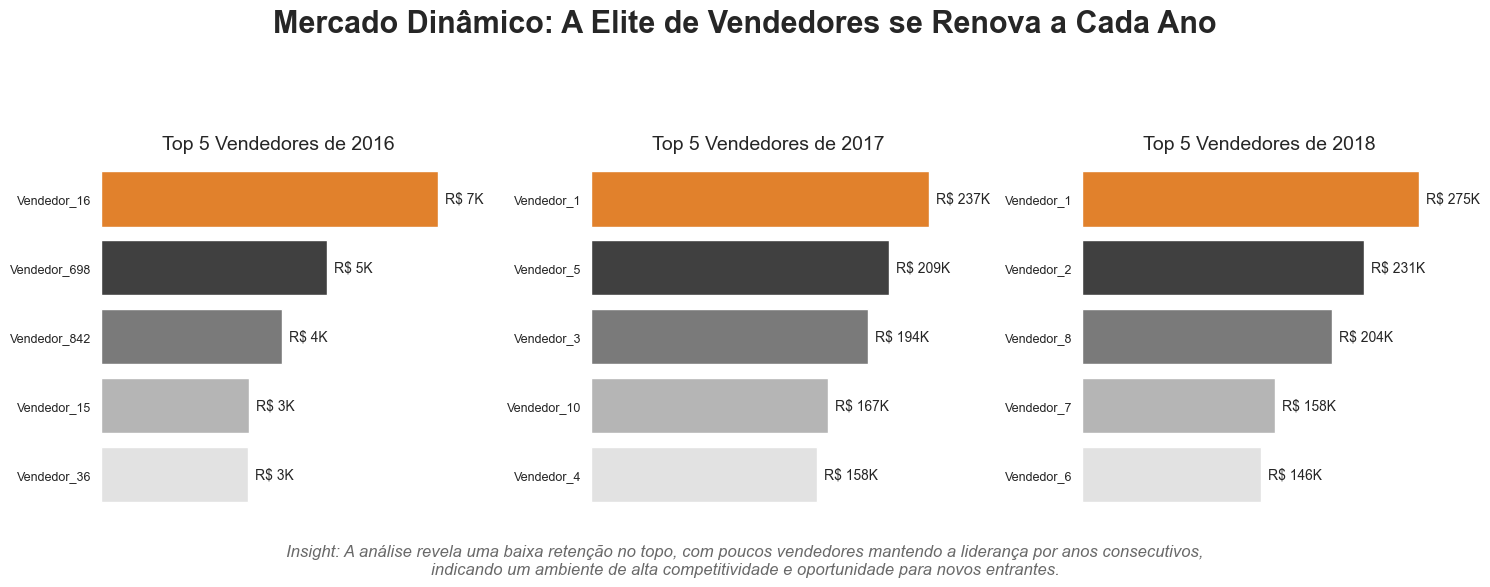

In [31]:
# --- 7: TOP 5 VENDEDORES POR ANO ---

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# --- 1: CRIAÇÃO DO MAPA MESTRE ---

# Irá garantir que o mapa seja criado com base no desempenho geral de todos os vendedores:
performance_vendedores = df_com_sellers.groupby('seller_id').agg(
    faturamento_total=('payment_value', 'sum')
).sort_values(by='faturamento_total', ascending=False)

all_unique_sellers = performance_vendedores.index.tolist()
seller_map = {seller_id: f'Vendedor_{i+1}' for i, seller_id in enumerate(all_unique_sellers)}


# --- ETAPA 2: PREPARAÇÃO DOS DADOS PARA O GRÁFICO ---

# Preparando o DataFrame 'top_5_df' e aplicando o mapa mestre.
# Calculando faturamento anual:
df_com_sellers['ano_da_compra'] = df_com_sellers['order_purchase_timestamp'].dt.year
faturamento_anual_vendedor = df_com_sellers.groupby(['ano_da_compra', 'seller_id'])['payment_value'].sum()

# Identificando os top 5 de cada ano:
top_5_vendedores_por_ano = faturamento_anual_vendedor.groupby(level='ano_da_compra').nlargest(5).reset_index(level=0, drop=True)
top_5_df = top_5_vendedores_por_ano.reset_index()

# --- APLICANDO O MAPA MESTRE ---

# Vai garantir os nomes consistentes.
top_5_df['seller_id'] = top_5_df['seller_id'].map(seller_map)


# --- ETAPA 3: VISUALIZAÇÃO DO GRÁFICO ---

# O código de visualização, agora usando o 'top_5_df' já traduzido.

# 3.1 Preparação do FacetGrid:
g = sns.FacetGrid(
    top_5_df, 
    col="ano_da_compra", 
    col_wrap=3, 
    height=5, 
    sharex=False,
    sharey=False 
)

# 3.2 Função de plotagem:
def plotar_top_vendedores(data, **kwargs):
    ax = plt.gca()
    dados_ordenados = data.sort_values(by='payment_value', ascending=False)
    
    paleta_cores = ['#ff7f0e'] + sns.color_palette("Greys_r", n_colors=len(dados_ordenados) - 1)
    
    sns.barplot(
        x='payment_value', 
        y='seller_id', 
        data=dados_ordenados, 
        palette=paleta_cores, 
        order=dados_ordenados['seller_id'],
        hue=dados_ordenados['seller_id'],   
        legend=False, 
        orient='h', 
        ax=ax
    )
    
    for patch in ax.patches:
        valor = patch.get_width()
        label = f'R$ {valor/1e3:.0f}K'
        ax.text(
            valor + (ax.get_xlim()[1] * 0.02),
            patch.get_y() + patch.get_height() / 2,
            label, 
            va='center', 
            ha='left', 
            fontsize=10
        )
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([])
    ax.tick_params(axis='y', labelsize=9)
    sns.despine(left=True, bottom=True)

# 3.3 Mapeando a função para a grade:
g.map_dataframe(plotar_top_vendedores)

# 3.4 Títulos e Design Final
g.fig.suptitle(
    'Mercado Dinâmico: A Elite de Vendedores se Renova a Cada Ano', 
    fontsize=22, 
    fontweight='bold', 
    y=1.08
)
g.set_titles("Top 5 Vendedores de {col_name}", size=14, y=1.02)

g.fig.text(
    0.5, 0.01, 
    'Insight: A análise revela uma baixa retenção no topo, com poucos vendedores mantendo a liderança por anos consecutivos,\nindicando um ambiente de alta competitividade e oportunidade para novos entrantes.', 
    ha='center', 
    va='top', 
    fontsize=12, 
    style='italic', 
    color='dimgray'
)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

    * Análise geográfica dos vendedores


In [ ]:
# --- 8: JUNTAR PERFORMACE COM LOCALIZAÇÃO ---

# Pegando a tabela de vendedores
df_sellers = dataframes['sellers']

# O 'performance_vendedores' tem o seller_id como índice, que vai transformando em coluna para o merge.
performance_com_id = performance_vendedores.reset_index()

# Juntando os dados de performance com os dados de localização
vendedores_com_localizacao = pd.merge(
    performance_com_id,
    df_sellers[['seller_id', 'seller_city', 'seller_state']], # Sommente será utilizado apenas as colunas de localização
    on='seller_id'
)

print("--- DADOS DE PERFORMACE E LOCALIZAÇÃO COMBINADO COM SUCESSO! ---")
print(vendedores_com_localizacao.head())

--- DADOS DE PERFORMACE E LOCALIZAÇÃO COMBINADO COM SUCESSO! ---
                          seller_id  faturamento_total            seller_city  \
0  7c67e1448b00f6e969d365cea6b010ab          512645.19        itaquaquecetuba   
1  1025f0e2d44d7041d6cf58b6550e0bfa          312456.49              sao paulo   
2  4a3ca9315b744ce9f8e9374361493884          306138.80               ibitinga   
3  1f50f920176fa81dab994f9023523100          291918.98  sao jose do rio preto   
4  53243585a1d6dc2643021fd1853d8905          284903.08       lauro de freitas   

  seller_state  
0           SP  
1           SP  
2           SP  
3           SP  
4           BA  


In [33]:
# --- 9: CALCULANDO O FATURAMENTO AGREGANDO POR ESTADO ---

# Agrupando por estado do vendedor e somando o faturamento total
faturamento_por_estado_vendedor = vendedores_com_localizacao.groupby('seller_state')['faturamento_total'].sum().sort_values(ascending=False)

print("\n--- FATURAMENTO AGREGADO POR ESTADO DO VENDEDOR ---")
print(faturamento_por_estado_vendedor.head(10))


--- FATURAMENTO AGREGADO POR ESTADO DO VENDEDOR ---
seller_state
SP    13448403.08
PR     1861222.48
MG     1571008.90
RJ     1101492.65
SC      888833.38
RS      562981.58
BA      368177.86
DF      137899.29
PE      124894.83
GO      112290.09
Name: faturamento_total, dtype: float64


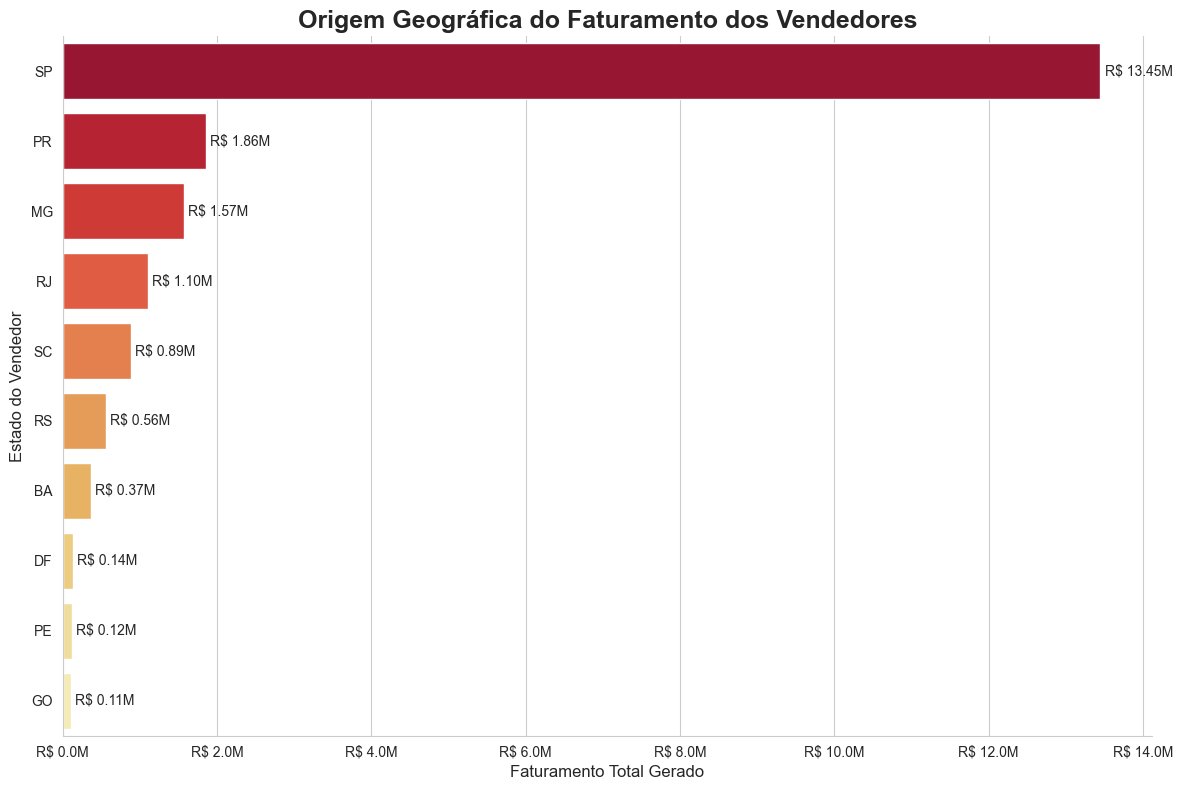

In [34]:
# --- 10: VISUALIZAÇÃO LOCALIZAÇÃO DOS VENDEDORES ---

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# --- PREPARAÇÃO DOS DADOS --- 

# Preparando os dados para o gráfico (Top 15 estados)
top_10_estados_vendedores = faturamento_por_estado_vendedor.head(10)

# --- CRIANDO O GRÁFICO ---
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x=top_10_estados_vendedores.values,
    y=top_10_estados_vendedores.index,
    palette='YlOrRd_r', 
    hue=top_10_estados_vendedores.index, 
    legend=False
)

# --- FORMATANDO O EIXO X ---

#  Criando uma função para mostrar os valores em milhões (R$ 8M)
def format_reais_milhoes(valor, pos):
    valor_em_milhoes = valor / 1e6
    return f'R$ {valor_em_milhoes:.1f}M'

formatter = FuncFormatter(format_reais_milhoes)
ax.xaxis.set_major_formatter(formatter)

# --- TÍTULO E DESIGN ---

plt.title('Origem Geográfica do Faturamento dos Vendedores', fontsize=18, fontweight='bold')
plt.xlabel('Faturamento Total Gerado', fontsize=12)
plt.ylabel('Estado do Vendedor', fontsize=12)
sns.despine()

# Adicionando os valores exatos nas barras
for container in ax.containers:
    ax.bar_label(container, labels=[f'R$ {v/1e6:.2f}M' for v in container.datavalues], padding=3)

plt.tight_layout()
plt.show()

## ANÁLISE DE PAGAMENTOS

    * Qual o ticket médio de cada método de pagamento? Compras caras são pagas da mesma forma que as baratas?
        * Análise do Valor da Compra
    
    * Como os brasileiros usam o parcelamento no cartão de crédito? Essa é uma análise super específica e valiosa para o nosso mercado.
        * Análise das Parcelas

In [35]:
# --- 1: O VALOR DE COMPRA POR MÉTODO DE PAGAMENTO ---

# Verificando a distribuição do valor de compra.

# Análise de valor de compra por método de pagamento
# Utilizando .describe() para dá uma visão estatística rápida antes de plotar
print("--- ESTATÍSTICA DO VALOR DE COMPRA POR MÉTODO DE PAGAMENTO ---")

df_final.groupby('payment_type')['payment_value'].describe()

--- ESTATÍSTICA DO VALOR DE COMPRA POR MÉTODO DE PAGAMENTO ---


,count,mean,std,min,25%,50%,75%,max
payment_type,,,,,,,,
boleto,23190.0,177.271270,291.099072,11.62,60.1025,105.980,184.0975,7274.88
credit_card,87776.0,179.723963,267.958451,0.01,65.6000,115.300,197.0700,13664.08
debit_card,1706.0,150.864531,257.959505,13.38,53.4700,97.535,172.8900,4445.50
not_defined,3.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.00
voucher,6465.0,67.427353,114.350182,0.00,18.0600,40.110,84.2500,3184.34


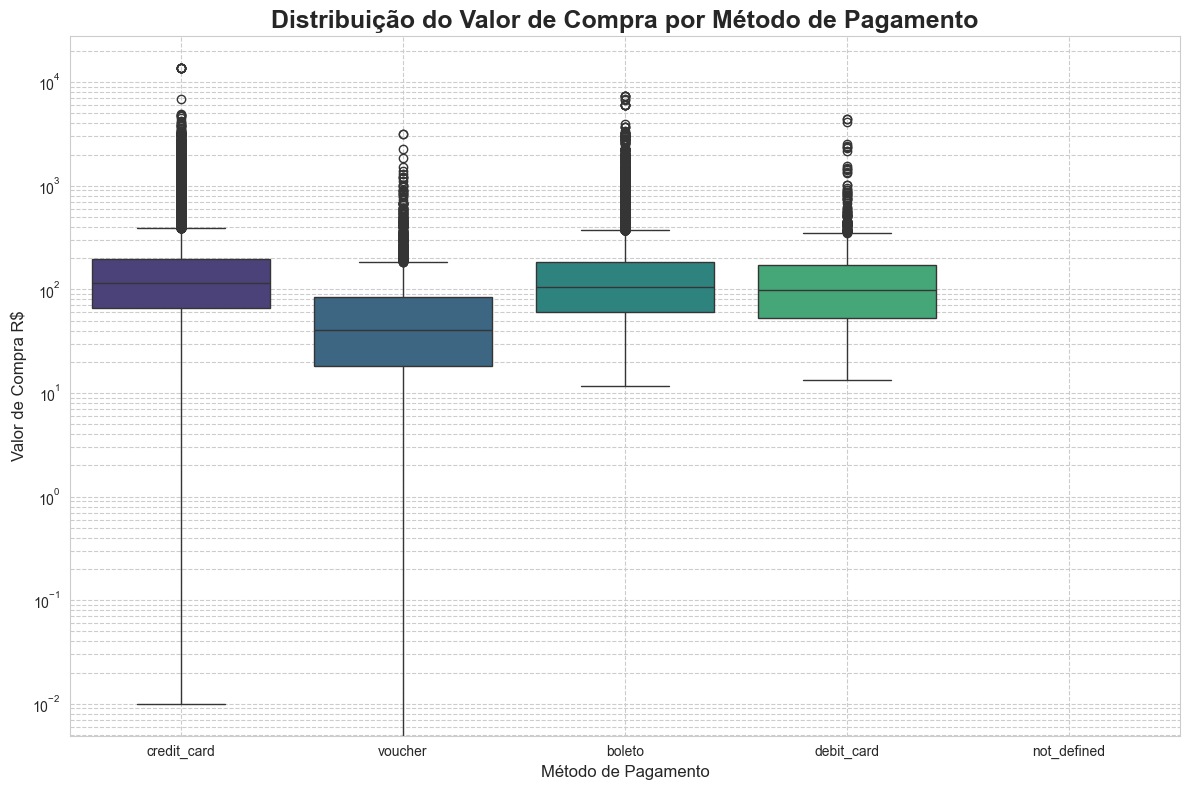

In [36]:
# --- 2: VISUALIZAÇÂO ---

# --- CRIANDO O GRAFICO ---
plt.figure(figsize=(12, 8))
ax = sns.boxplot(
    data=df_final,
    x='payment_type',
    y='payment_value',
    palette='viridis',
    hue='payment_type',
    legend=False
)

# --- TITULOS E DESIGN ---
plt.title('Distribuição do Valor de Compra por Método de Pagamento', fontsize=18, fontweight='bold')
plt.xlabel('Método de Pagamento', fontsize=12)
plt.ylabel('Valor de Compra R$', fontsize=12)

# Como o valor pode ter outliers muito altos, utilizarei uma escala de log
# para conseguir visualizar melhor a distribuição dos valores mais comuns.
ax.set_yscale('log')
plt.grid(True, which="both", ls="--") # Melhora a leitura da escala log

plt.tight_layout()
plt.show()

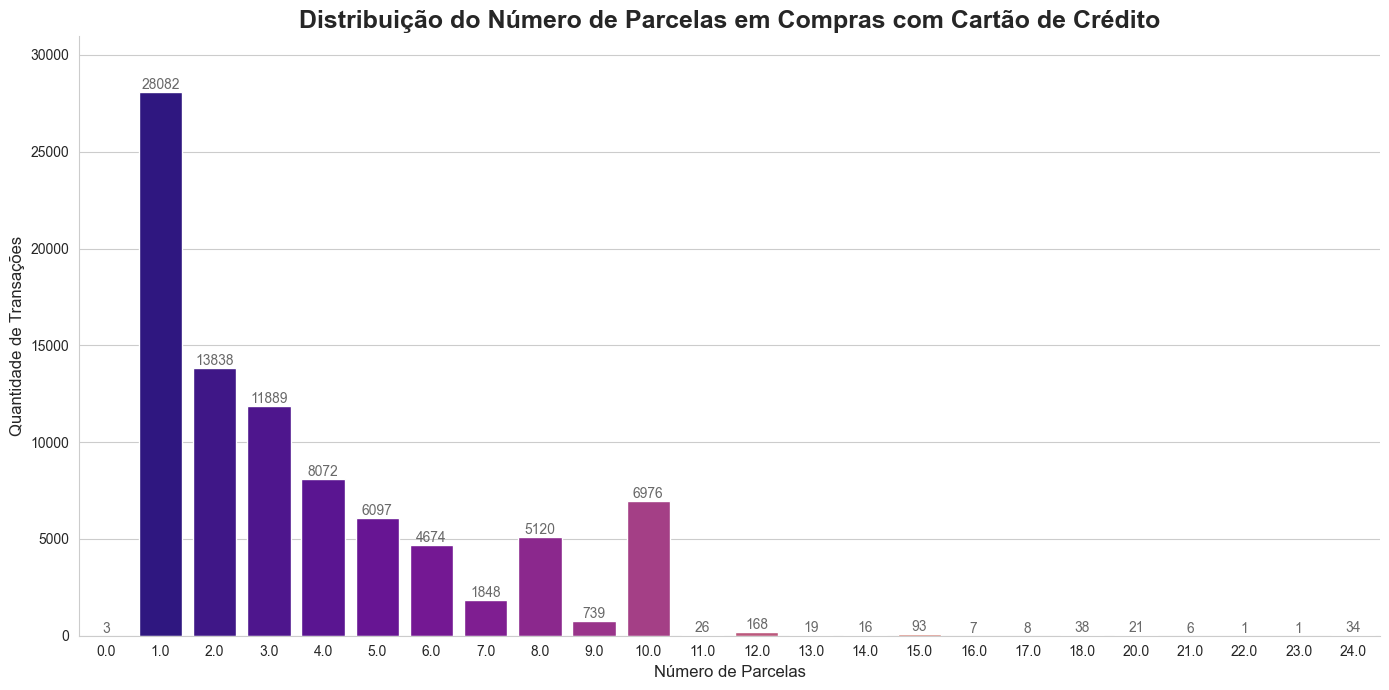

In [ ]:
# --- 3: ANÁLISE DE COMPRAS PARCELADAS COM CARTÃO DE CRÉDITO ---

# 1. Filtrando o Dataframe para conter apenas pagamentos com cartão de crédito
df_cartao = df_final[df_final['payment_type'] == 'credit_card']

# 2. Contagem da frequência de cada número de parcelas
parcelas_counts = df_cartao['payment_installments'].value_counts().sort_index()


# --- CRIANDO O GRÁFICO ---
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    x=parcelas_counts.index,
    y=parcelas_counts.values,
    palette='plasma',
    hue=parcelas_counts.index,
    legend=False
)

# Adicionando os rótulos de dados
for container in ax.containers:
    ax.bar_label(container, fontsize=10, color='dimgray')

# --- TÍTULOS E DESIGN ---
plt.title('Distribuição do Número de Parcelas em Compras com Cartão de Crédito', fontsize=18, fontweight='bold')
plt.xlabel('Número de Parcelas', fontsize=12)
plt.ylabel('Quantidade de Transações', fontsize=12)
ax.set_ylim(0, ax.get_ylim()[1] * 1.05)   # Conf. Para o espaço dos rótulos
sns.despine()

plt.tight_layout()
plt.show()

## ANÁLISE DE CLIENTES
    * Calculos das Métricas RFM


Iniciando análise RFM...
Calculando métricas RFM...
Métricas calculadas para 96096 clientes
Criando segmentos RFM...
Segmentação concluída: 6 segmentos criados

ANÁLISE DOS SEGMENTOS RFM
                    Recency        Frequency        MonetaryValue          \
                       mean median      mean median          mean  median   
Segmento                                                                    
Campeões             107.82  107.0      1.14    1.0        382.79  206.69   
Clientes Econômicos  505.91  499.0      1.00    1.0         43.84   44.10   
Clientes Fiéis       347.22  325.0      1.11    1.0        362.58  206.82   
Clientes Hibernando  217.28  217.0      1.00    1.0        206.56  111.69   
Clientes Regulares   501.55  493.0      1.01    1.0        217.61  111.02   
Clientes em Risco    218.86  221.0      1.02    1.0         65.40   64.09   

                                customer_unique_id  
                            sum              count  
Segmento     

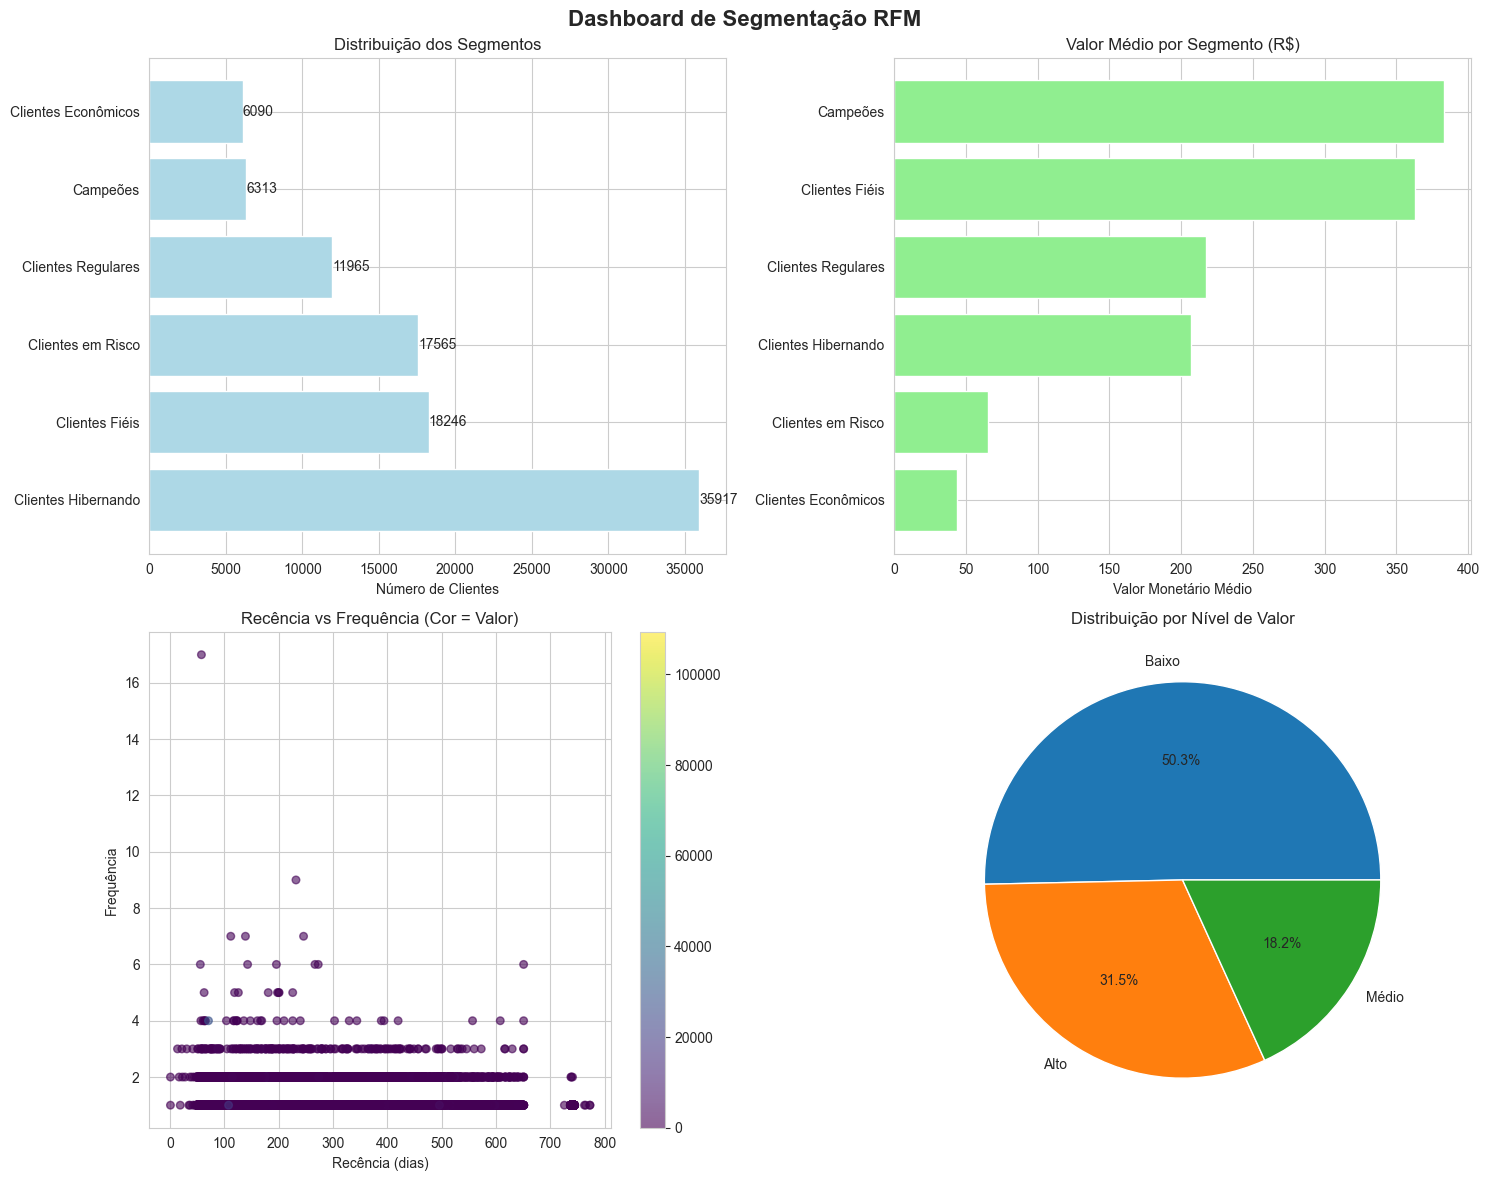


✅ Análise concluída! Resultados salvos em 'segmentacao_rfm.csv'


In [ ]:
# --- 1: CRIANDO O CÁLCULO RFM ---

# A função que vai Calcula métricas RFM para segmentação de clientes:
# 1. Args: df (pd.Dataframe): DataFrame com transações
# 2. Returns: pd.Dataframe: Tabela RFM com recência, frequência e valor monetário
def calcular_rfm_pleno(df):
  
    print("Calculando métricas RFM...")
    
    # Data de referência
    snapshot_date = df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)
    
    # Agregação com groupby
    rfm = df.groupby('customer_unique_id').agg({
        'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
        'order_id': 'nunique',
        'payment_value': 'sum'
    }).rename(columns={
        'order_purchase_timestamp': 'Recency',
        'order_id': 'Frequency', 
        'payment_value': 'MonetaryValue'
    }).reset_index()
    
    print(f"Métricas calculadas para {len(rfm)} clientes")
    return rfm

# --- 2: SEGMENTAÇÃO ---

# Função para segmenta clientes baseado nos scores RFM:
def segmentar_clientes_pleno(rfm_df):
 
    print("Criando segmentos RFM...")
    
    # Criando scores com tratamento para valores duplicados:
    rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=4, labels=[4, 3, 2, 1], duplicates='drop')
    
    # Rank para Frequency e MonetaryValue para evitar valores duplicados
    rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4])
    rfm_df['M_Score'] = pd.qcut(rfm_df['MonetaryValue'].rank(method='first'), q=4, labels=[1, 2, 3, 4])
    
    # Segmentação usando nas operações vetoriais:
    conditions = [
        (rfm_df['R_Score'] == 4) & (rfm_df['F_Score'] >= 3) & (rfm_df['M_Score'] >= 3),
        (rfm_df['R_Score'] >= 3) & (rfm_df['F_Score'] >= 3) & (rfm_df['M_Score'] >= 3),
        (rfm_df['R_Score'] <= 2) & (rfm_df['F_Score'] >= 3),
        (rfm_df['R_Score'] <= 2) & (rfm_df['F_Score'] <= 2),
        (rfm_df['R_Score'] == 4) & (rfm_df['F_Score'] == 1),
        (rfm_df['R_Score'] >= 3) & (rfm_df['M_Score'] == 1)
    ]
    
    segments = [
        'Campeões',
        'Clientes Fiéis', 
        'Clientes em Risco',
        'Clientes Hibernando',
        'Novos Clientes',
        'Clientes Econômicos'
    ]
    
    rfm_df['Segmento'] = np.select(conditions, segments, default='Clientes Regulares')
    
    # Adiciona uma coluna de valor para análise
    rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(int) + rfm_df['F_Score'].astype(int) + rfm_df['M_Score'].astype(int)
    rfm_df['Nivel_Valor'] = pd.qcut(rfm_df['RFM_Score'], q=3, labels=['Baixo', 'Médio', 'Alto'])
    
    print(f"Segmentação concluída: {rfm_df['Segmento'].nunique()} segmentos criados")
    return rfm_df

# --- 3: ANÁLISE E VISUALIZAÇÃO ---

# Função para realizar análise descritiva dos segmentos RFM:
def analisar_segmentos(rfm_df):
   
    print("\n" + "="*50)
    print("ANÁLISE DOS SEGMENTOS RFM")
    print("="*50)
    
    # Estatísticas por segmento
    stats_segmentos = rfm_df.groupby('Segmento').agg({
        'Recency': ['mean', 'median'],
        'Frequency': ['mean', 'median'], 
        'MonetaryValue': ['mean', 'median', 'sum'],
        'customer_unique_id': 'count'
    }).round(2)
    
    print(stats_segmentos)
    
    return stats_segmentos

# Função para criar as visualizações:
def criar_dashboard_rfm(rfm_df):
  
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Dashboard de Segmentação RFM', fontsize=16, fontweight='bold')
    
    # Gráfico 1: Distribuição dos segmentos
    segment_counts = rfm_df['Segmento'].value_counts()
    axes[0,0].barh(segment_counts.index, segment_counts.values, color='lightblue')
    axes[0,0].set_title('Distribuição dos Segmentos')
    axes[0,0].set_xlabel('Número de Clientes')
    
    # Adiciona valores nas barras
    for i, v in enumerate(segment_counts.values):
        axes[0,0].text(v + 10, i, str(v), va='center')

 # ------------------------------------------------------------------------------------------------

    # Gráfico 2: Valor médio por segmento
    valor_medio = rfm_df.groupby('Segmento')['MonetaryValue'].mean().sort_values()
    axes[0,1].barh(valor_medio.index, valor_medio.values, color='lightgreen')
    axes[0,1].set_title('Valor Médio por Segmento (R$)')
    axes[0,1].set_xlabel('Valor Monetário Médio')

 # ------------------------------------------------------------------------------------------------

    # Gráfico 3: Dispersão Recência vs Frequência
    scatter = axes[1,0].scatter(rfm_df['Recency'], rfm_df['Frequency'], 
                               c=rfm_df['MonetaryValue'], alpha=0.6, cmap='viridis', s=30)
    axes[1,0].set_title('Recência vs Frequência (Cor = Valor)')
    axes[1,0].set_xlabel('Recência (dias)')
    axes[1,0].set_ylabel('Frequência')
    plt.colorbar(scatter, ax=axes[1,0])
    
 # ------------------------------------------------------------------------------------------------

    # Gráfico 4: Proporção por nível de valor
    nivel_counts = rfm_df['Nivel_Valor'].value_counts()
    axes[1,1].pie(nivel_counts.values, labels=nivel_counts.index, autopct='%1.1f%%')
    axes[1,1].set_title('Distribuição por Nível de Valor')
    
    plt.tight_layout()
    plt.show()

# --- EXECUÇÃO PRINCIPAL ---

# Função principal para execução do análise RFM.
def main():

    print("Iniciando análise RFM...")
    
    try:
        # 1. Cálculo RFM
        rfm_data = calcular_rfm_pleno(df_completo)
        
        # 2. Segmentação
        rfm_segmentado = segmentar_clientes_pleno(rfm_data)
        
        # 3. Análise
        stats = analisar_segmentos(rfm_segmentado)
        
        # 4. Visualização
        criar_dashboard_rfm(rfm_segmentado)
        
        # 5. Salvando resultados
        rfm_segmentado.to_csv('segmentacao_rfm.csv', index=False)
        print("\n✅ Análise concluída! Resultados salvos em 'segmentacao_rfm.csv'")
        
        return rfm_segmentado
        
    except Exception as e:
        print(f" Erro na análise: {e}")
        return None

# Executa a análise
if __name__ == "__main__":
    resultado_rfm = main()

## FIM